In [85]:
# Importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [86]:
# Loading data
df = pd.read_csv('/Users/thinkwalnut/Desktop/vrushali/datasets/archive/Loan_Prediction_Dataset.csv')
df.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [87]:
df.describe()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


#Processing the data

In [89]:
# find the null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [90]:
# fill the missing values for numerical terms - mean
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

In [91]:
# fill the missing values for categorical terms - mode
df['Gender'] = df["Gender"].fillna(df['Gender'].mode()[0])
df['Married'] = df["Married"].fillna(df['Married'].mode()[0])
df['Dependents'] = df["Dependents"].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df["Self_Employed"].fillna(df['Self_Employed'].mode()[0])

In [92]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Exploratory data analysis

<AxesSubplot:xlabel='Gender', ylabel='count'>

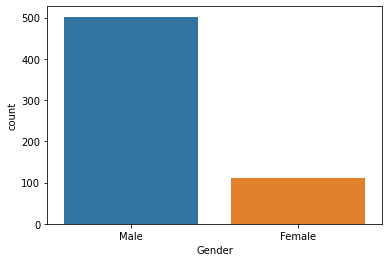

In [93]:
# categorical attributes visualization
sns.countplot(df['Gender'])

<AxesSubplot:xlabel='Married', ylabel='count'>

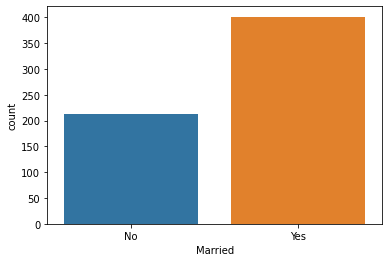

In [94]:
sns.countplot(df['Married'])

<AxesSubplot:xlabel='Dependents', ylabel='count'>

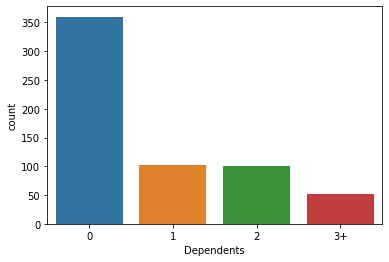

In [95]:
sns.countplot(df['Dependents'])

<AxesSubplot:xlabel='Education', ylabel='count'>

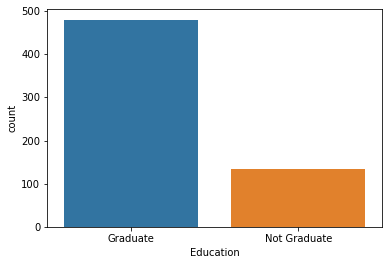

In [96]:
sns.countplot(df['Education'])

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

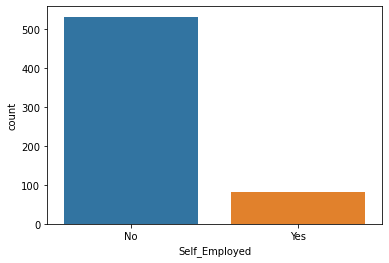

In [97]:
sns.countplot(df['Self_Employed'])

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

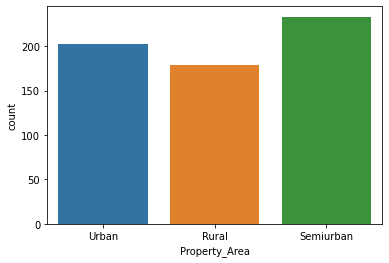

In [98]:
sns.countplot(df['Property_Area'])

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

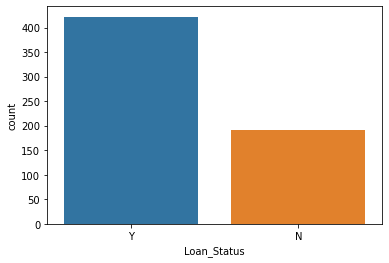

In [99]:
sns.countplot(df['Loan_Status'])

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

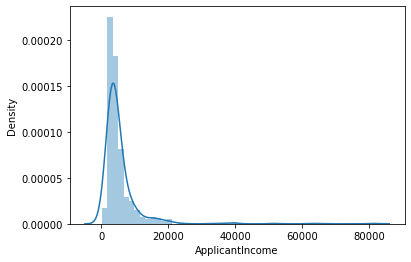

In [100]:
# numerical attributes visualization
sns.distplot(df["ApplicantIncome"])

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

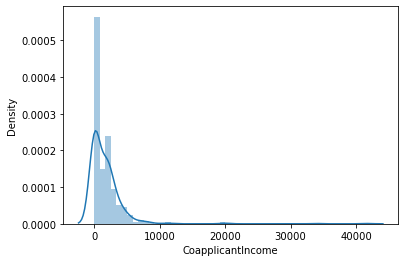

In [101]:
sns.distplot(df["CoapplicantIncome"])

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

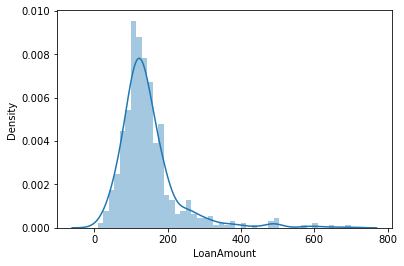

In [102]:
sns.distplot(df["LoanAmount"])

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

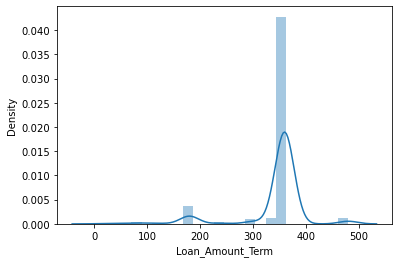

In [103]:
sns.distplot(df['Loan_Amount_Term'])

<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

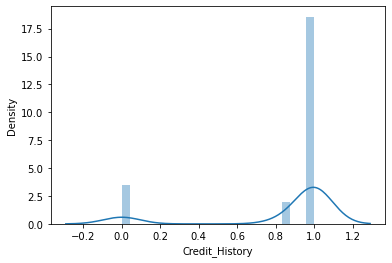

In [104]:
sns.distplot(df['Credit_History'])

# Creation of new attributes 

In [105]:
# total income
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0  146.412162             360.0   
1             4583             1508.0  128.000000             360.0   
2             3000                0.0   66.000000             360.0   
3             2583             2358.0  120.000000             360.0   
4             6000                0.0  141.000000             360.0   

   Credit_History Property_Area Loan_Status  Total_Income  
0             1.0         Urban           Y        5849.0  
1             1.0         Rural           N        6091.0  
2             1.0         Urban           Y        3000.0  
3             1.0         Urban           Y        4941.0  
4             1.0         Urban           Y        6000.0

# Log Transformation

<AxesSubplot:xlabel='ApplicantIncomeLog', ylabel='Density'>

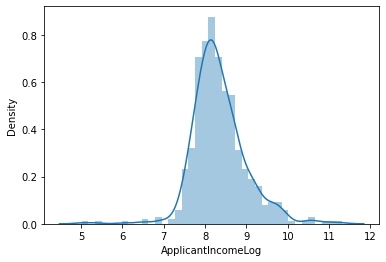

In [106]:
# apply log transformation to the attribute
df['ApplicantIncomeLog'] = np.log(df['ApplicantIncome'])
sns.distplot(df["ApplicantIncomeLog"])

<AxesSubplot:xlabel='ApplicantIncomeLog', ylabel='Density'>

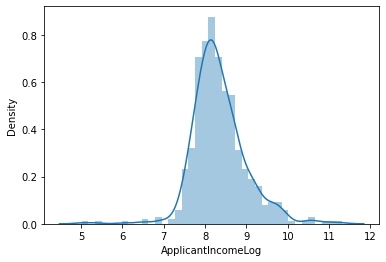

In [107]:
df['CoapplicantIncomeLog'] = np.log(df['CoapplicantIncome'])
sns.distplot(df["ApplicantIncomeLog"])

<AxesSubplot:xlabel='LoanAmountLog', ylabel='Density'>

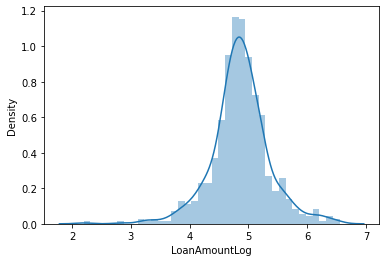

In [108]:
df['LoanAmountLog'] = np.log(df['LoanAmount'])
sns.distplot(df["LoanAmountLog"])

<AxesSubplot:xlabel='Loan_Amount_Term_Log', ylabel='Density'>

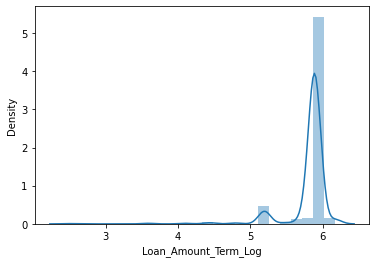

In [109]:
df['Loan_Amount_Term_Log'] = np.log(df['Loan_Amount_Term'])
sns.distplot(df["Loan_Amount_Term_Log"])

<AxesSubplot:xlabel='Total_Income_Log', ylabel='Density'>

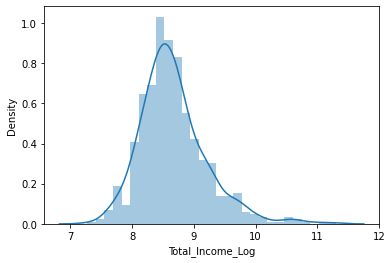

In [110]:
df['Total_Income_Log'] = np.log(df['Total_Income'])
sns.distplot(df["Total_Income_Log"])

# Corelation matrix

<AxesSubplot:>

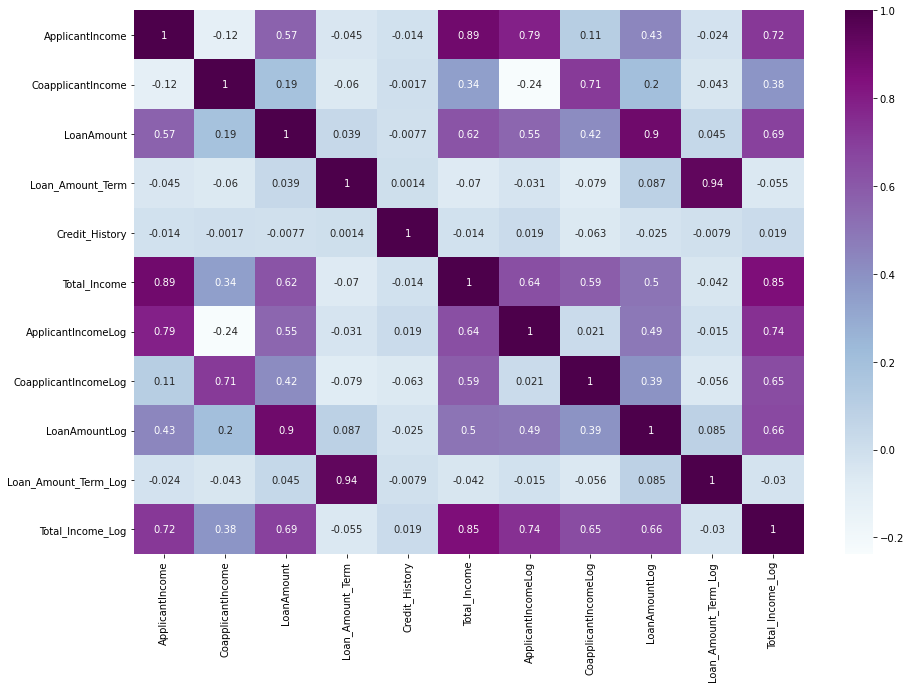

In [111]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True, cmap="BuPu")

In [112]:
df.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0  146.412162             360.0   
1             4583             1508.0  128.000000             360.0   
2             3000                0.0   66.000000             360.0   
3             2583             2358.0  120.000000             360.0   
4             6000                0.0  141.000000             360.0   

   Credit_History Property_Area Loan_Status  Total_Income  ApplicantIncomeLog  \
0             1.0         Urban           Y        5849.0            8.674026   
1             1.0         Rural           N        6091.0            8.430109   
2             1.0         Urban           Y        3000.0            8.006368   
3             1.0         Urban           Y        4941.0            7.856707   
4             1.0         Urban           Y        6000.0            8.699515   

   CoapplicantIncomeLog  LoanAmountLog  Loan_Amount_Term_Log  Total_Income_Log  
0                  -inf       4.986426              5.886104          8.674026  
1              7.318540       4.852030              5.886104          8.714568  
2                  -inf       4.189655              5.886104          8.006368  
3              7.765569       4.787492              5.886104          8.505323  
4                  -inf       4.948760              5.886104          8.699515

In [113]:
# drop unnecessary columns
cols = ['ApplicantIncome', 'CoapplicantIncome', "LoanAmount", "Loan_Amount_Term", "Total_Income", 'Loan_ID', 'CoapplicantIncomeLog']
df = df.drop(columns=cols, axis=1)
df.head()

Gender Married Dependents     Education Self_Employed  Credit_History  \
0   Male      No          0      Graduate            No             1.0   
1   Male     Yes          1      Graduate            No             1.0   
2   Male     Yes          0      Graduate           Yes             1.0   
3   Male     Yes          0  Not Graduate            No             1.0   
4   Male      No          0      Graduate            No             1.0   

  Property_Area Loan_Status  ApplicantIncomeLog  LoanAmountLog  \
0         Urban           Y            8.674026       4.986426   
1         Rural           N            8.430109       4.852030   
2         Urban           Y            8.006368       4.189655   
3         Urban           Y            7.856707       4.787492   
4         Urban           Y            8.699515       4.948760   

   Loan_Amount_Term_Log  Total_Income_Log  
0              5.886104          8.674026  
1              5.886104          8.714568  
2              5.886104          8.006368  
3              5.886104          8.505323  
4              5.886104          8.699515

# Label Encoding

In [114]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender',"Married","Education",'Self_Employed',"Property_Area","Loan_Status","Dependents"]
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

In [115]:
df.head()

Gender  Married  Dependents  Education  Self_Employed  Credit_History  \
0       1        0           0          0              0             1.0   
1       1        1           1          0              0             1.0   
2       1        1           0          0              1             1.0   
3       1        1           0          1              0             1.0   
4       1        0           0          0              0             1.0   

   Property_Area  Loan_Status  ApplicantIncomeLog  LoanAmountLog  \
0              2            1            8.674026       4.986426   
1              0            0            8.430109       4.852030   
2              2            1            8.006368       4.189655   
3              2            1            7.856707       4.787492   
4              2            1            8.699515       4.948760   

   Loan_Amount_Term_Log  Total_Income_Log  
0              5.886104          8.674026  
1              5.886104          8.714568  
2              5.886104          8.006368  
3              5.886104          8.505323  
4              5.886104          8.699515

# Test Train Split

In [116]:
# specify input and output attributes
X = df.drop(columns=['Loan_Status'], axis=1)
y = df['Loan_Status']

In [117]:
print(X)
print(y)

     Gender  Married  Dependents  Education  Self_Employed  Credit_History  \
0         1        0           0          0              0             1.0   
1         1        1           1          0              0             1.0   
2         1        1           0          0              1             1.0   
3         1        1           0          1              0             1.0   
4         1        0           0          0              0             1.0   
..      ...      ...         ...        ...            ...             ...   
609       0        0           0          0              0             1.0   
610       1        1           3          0              0             1.0   
611       1        1           1          0              0             1.0   
612       1        1           2          0              0             1.0   
613       0        0           0          0              1             0.0   

     Property_Area  ApplicantIncomeLog  LoanAmountLog  Loan_Amo

In [118]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=49)

# Model Training

In [119]:
# classify function
from sklearn.model_selection import cross_val_score
def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
    model.fit(x_train, y_train)
    print("Accuracy is",model.score(x_test, y_test)*100)
    #cross validation - it is used for better validation of model
    # eg: cv-5, train-4, test-1
    score = cross_val_score(model, x, y, cv=5)
    print("Cross validation is",np.mean(score)*100)

In [120]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X, y)

Accuracy is 79.22077922077922
Cross validation is 80.9462881514061


In [121]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, X, y)

Accuracy is 71.42857142857143
Cross validation is 71.01426096228177


In [122]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
model = RandomForestClassifier()
classify(model, X, y)

Accuracy is 77.92207792207793
Cross validation is 78.66719978675197


In [123]:
model = ExtraTreesClassifier()
classify(model, X, y)

Accuracy is 73.37662337662337
Cross validation is 77.03851792616287


# Hyperparameter Testing

In [124]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=25, max_depth=7, max_features=1)
classify(model, X, y)

Accuracy is 79.22077922077922
Cross validation is 80.45715047314408


# Confusion Matrix
A confusion matrix is a summary of prediction results on a classification problem. The number of correct and incorrect predictions are summarized with count values and broken down by each class. It gives us insight not only into the errors being made by a classifier but more importantly the types of errors that are being made.

In [125]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [126]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[20, 25],
       [10, 99]])

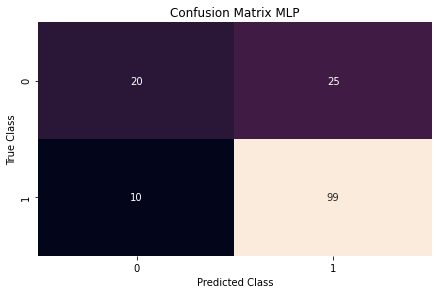

In [127]:
#CM matrix

sns.heatmap(cm, annot=True, cbar=None, fmt = 'g')
plt.title("Confusion Matrix MLP"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [130]:
# Building a predictive model
input_data = (1,1,0,1,1,1,0,7.972466,5.533389, 5.886104,9.025456)

# Changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape this above array
input_data_reshape = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshape)
print("The predicted status of loan is:", prediction[0])

The predicted status of loan is: 1
